<a href="https://colab.research.google.com/github/NemisysAxe/Bootcamp-Exploratory-Data-Analysis-/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bootcamp Exploratory data analysis

The data set consists of health and demographic data for the period 2014-2015, obtained from Global Health Observatory Data Repository.

Questions

1. Are there any missing values in the data set? What, if anything should be done about them if there are?

2. Are there any other problems with the data? If so, fix them.

3. Identify the country with the lowest % of their population under 15 and the one with the highest.

4. Which region has the highest % of their population over 60?

5. Does fertility decrease as income increases? Are there any countries that don’t seem to follow this relation?

6. Which regions have the lowest literacy rates?

7. Which regions have the lowest child mortality rates?

8. What is the life expectancy across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about life expectancy across different regions?

9. How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

10. Create appropriate graphs to visually represent the relationship between literacy and life expectancy by region, and then for African countries. What can be concluded from the graphs? How confident can we be in the relationships represented here?







#Exporting the csv file into collab. 




In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/NemisysAxe/Bootcamp-Exploratory-Data-Analysis-/main/data.csv'

df1 = pd.read_csv(url)
df1.head()



,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/NemisysAxe/Bootcamp-Exploratory-Data-Analysis-/main/data.csv'

df1 = pd.read_csv(url)

df1.shape

# 1. Yes there are values missing and the following can be done to handle the missing values. 


*   Either fill the null(missing) values with some values (like statistical findings such as an mean or median)
*   Drop such rows
*   Either replace them with zero (0)


The workings below diplays how I found that the dataframe has null values.





In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/NemisysAxe/Bootcamp-Exploratory-Data-Analysis-/main/data.csv'

df1 = pd.read_csv(url)

df1.isnull()


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,False,False,False,False,False,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,False,False,False,False,False,False,False,False,False,True,False,False,False
190,False,False,False,False,False,False,False,False,False,False,False,True,True
191,False,False,False,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,False,False,False


The following table displays a breakdown of the number of the null values within each category. 

In [ ]:
df1.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

The total number of null values within the dataframe.

In [ ]:
df1.isnull().sum().sum()

330

# 2. Other problems with the data 



*   The columns with missing values are columns that mostly contain floats, therefore the 'NaN' entry should be replaced with numeric values to match the other element types (floats). 

*   The null values can be replaced with the a specific value, zero, statistical values such as mean, median or random values. 



*   Below I created a new dataframe named df2, whereby the null values have been replaced with the mean of its respective column. This is done so that the data can be used in a more effective manner. 










In [ ]:
df2 = df1.fillna(value = df1.mean())

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.400000,60,98.5,54.26,83.71068,1140.000000,90.850495,89.632673
1,Albania,Europe,3162,21.33,14.93,1.750000,74,16.7,96.39,83.71068,8820.000000,90.850495,89.632673
2,Algeria,Africa,38482,27.42,7.17,2.830000,73,20.0,98.99,83.71068,8310.000000,98.200000,96.400000
3,Andorra,Europe,78,15.20,22.86,2.940656,82,3.2,75.49,83.71068,13320.925926,78.400000,79.400000
4,Angola,Africa,20821,47.58,3.84,6.100000,51,163.5,48.38,70.10000,5230.000000,93.100000,78.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),Americas,29955,28.84,9.17,2.440000,75,15.3,97.78,83.71068,12430.000000,94.700000,95.100000
190,Viet Nam,Western Pacific,90796,22.87,9.32,1.790000,75,23.0,143.39,93.20000,3250.000000,90.850495,89.632673
191,Yemen,Eastern Mediterranean,23852,40.72,4.54,4.350000,64,60.0,47.05,63.90000,2170.000000,85.500000,70.500000
192,Zambia,Africa,14075,46.73,3.95,5.770000,55,88.5,60.59,71.20000,1490.000000,91.400000,93.900000


#3. We have identified the countries with the lowest % of their population under 15 and the one with the highest.




*   The following logical arguments were bulit in order to uncover the solution.
*   Because the "Under15" column had no null elements, the original dataframe was used.







In [ ]:
#This code was built with a logical argument to indentify the highest population under 15.

#Assigning the minimum value to highest_population variable
highest_population = df1.Under15.max()

#Assigning the minimum value to highest_population variable
df1[df1['Under15'] == highest_population] 


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
123,Niger,Africa,17157,49.99,4.26,7.58,56,113.5,29.52,NaN,720.0,64.2,52.0


In [ ]:
#This code was built with a logical argument to indentify the lowest population under 15.

#Assigning the minimum value to lowest_population variable
lowest_population = df1.Under15.min()

#Comparing the list "Under15" with lowest_population in order to find and display the correct row. 
df1[df1['Under15'] == lowest_population]


,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
85,Japan,Western Pacific,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


After executing the code, we can note that the country with the 
* highest population under-15 is **Niger** and; 
* the country with the lowest is **Japan**.

#4. In the following workings, we are required to determine the region that has the highest% of their population over 60. 

**The original dataframe was used, because the 'Over60' column did not have any null values.**



In [ ]:
#Changing the dataframe index from 'Country' to 'Region'. 
df3 = df1.set_index('Region')

#Assigning the maximum value to highest_population_over60 variable
highest_population_over60 = df3.Over60.max()

#Comparing the list "Under15" with highest_population_over60 in order to find and display the correct row
df3[df3['Over60'] == highest_population_over60]


,Country,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
Region,,,,,,,,,,,,
Western Pacific,Japan,127000,13.12,31.92,1.39,83,3.0,104.95,NaN,35330.0,NaN,NaN


* When dealing with this question, the first things that had to be done was to change the dataframe's original index from 'Country' to 'Region'.

* In order not to affect the original a second dataframe named "**df3**" was created with the new index 'Region'.

* After working the code and running it, I found that the **Western Pacific** is the region with the highest population over 60. 

#5. Does fertility decrease as income increase?



In [ ]:
#Importing numpy as np
import numpy as np


#Creating a new dataframe, whereby the null values were filled with the mean value of their respective column.
df2 = df1.fillna(value = df1.mean())

#Setting FertilityRate to np_fertility
np_fertility = df2.FertilityRate

#Setting GNI to np_GNI
np_GNI = df2.GNI

#Determining the correlation betwwen np_fertility and np_GNI
corr = np.corrcoef(np_fertility, np_GNI)

corr



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


array([[ 1.        , -0.51527293],
       [-0.51527293,  1.        ]])

In [ ]:
df2['FertilityRate'].corr(df2['GNI'])


-0.5152729295055448

*Above, I have used two different methods to calculate the correlation between 'FertilityRate' and 'GNI'. The correlation coefficient between the two columns is -0.5152729295055448

#6 Which regions have the lowest literacy rates?



In [ ]:
#Filling the null values with the mean from within its' respective column and assigning it to a new dataframe df2 
df2 = df1.fillna(value = df1.mean())

#Changing the index from 'Country' to 'Region'
df4 = df2.set_index('Region')

#Finding the min() value from 'LiteracyRate'
df4.LiteracyRate.min()

#Assigning LiteracyRate from df2 to lowest_literacy_rate
lowest_literacy_rate = df4.LiteracyRate.min()

#This logical argument is display the row with lowest 'LiteracyRate'.
df4[df4['LiteracyRate'] == lowest_literacy_rate]



* The region with the lowest literacy rates is Africa, with a rate of 31.1%







#7. Which regions have the lowest child mortality rates?

*For the child mortality rate calculation, the original dataframe was used since it the 'ChildMortality' column did not have any null values.  

In [ ]:
#Changing the index of the dataframe from 'Country' to 'Region'and assigning the newly indexed table to a new dataframe newly_indexed
newly_indexed = df1.set_index('Region')

#Finding the lowest value from the 'ChildMortality' column.
newly_indexed.ChildMortality.min()

#Assignning result to lowest_childmortality 
lowest_childmortality = newly_indexed.ChildMortality.min()

#Comparing the list "ChildMortality" with the min() value in order to find and display the correct row
newly_indexed[newly_indexed['ChildMortality'] == lowest_childmortality]


,Country,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
Region,,,,,,,,,,,,
Europe,Luxembourg,524,17.46,19.15,1.65,82,2.2,148.27,NaN,64260.0,93.6,95.7


In [69]:
df1.isnull().sum()

Country                           0
Region                            0
Population                        0
Under15                           0
Over60                            0
FertilityRate                    11
LifeExpectancy                    0
ChildMortality                    0
CellularSubscribers              10
LiteracyRate                     91
GNI                              32
PrimarySchoolEnrollmentMale      93
PrimarySchoolEnrollmentFemale    93
dtype: int64

#8. What is the life expectancy across different regions? Create a box-and-whisker plot to investigate this. What can we conclude about life expectancy across different regions?

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


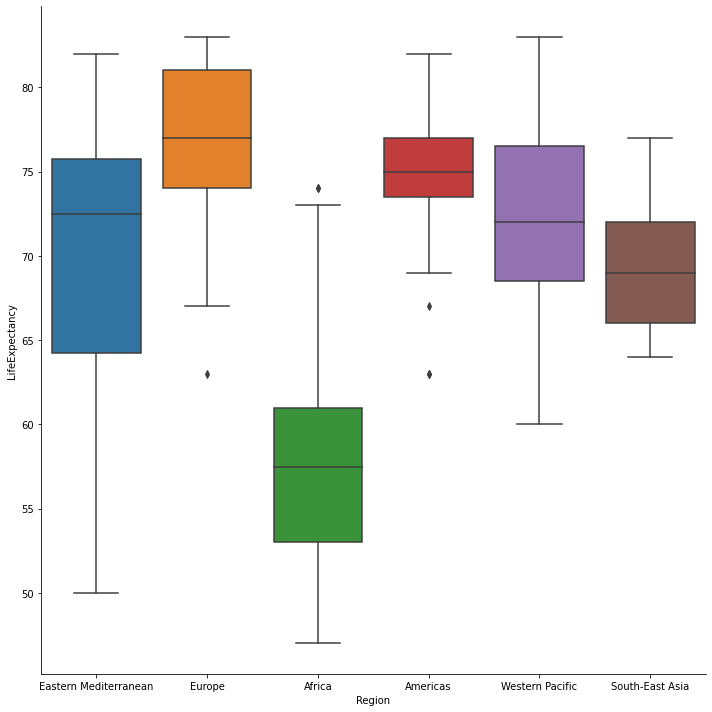

In [100]:
#Importing the packages that will be needed to create a box-and-whisker plot.
import seaborn as sns
import matplotlib.pyplot as plt


#Creating the box-and-whisker plot.
plotbox = sns.catplot(x= "Region",
                      size= 10,
                      y= "LifeExpectancy", 
                      data = df1,
                      kind="box")
#This command displays our above created box-and-whisker plot.
plt.show()

In [94]:
df1.Region.value_counts()

Europe                   53
Africa                   46
Americas                 35
Western Pacific          27
Eastern Mediterranean    22
South-East Asia          11
Name: Region, dtype: int64

#9. How is life expectancy related to wealth across different regions? How is wealth related to fertility across different regions? Do these relationships hold for African countries?

In [ ]:
df1.isnull().sum()

* Since some of the columns that we have to work with have null values, I created a new dataframe, whereby the null values were filled with different mean values from their respective columns.



How is life expectancy related to wealth? 

In [105]:
#Filling the null values with the mean and then assigning the new dataframe to dfmean 
dfmean = df1.fillna(value = df1.mean())

#Determining the relationship between life expectancy and wealth across different regions
dfmean['LifeExpectancy'].corr(dfmean['GNI'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


0.6103444758749542

* From the above calculation we can note that 'LifeExpectancy' and 'GNI' have a positive correlation of **0.6103444758749542**. 
* Meaning that it is more likely for an individual to have a higher life expectancy, the more wealth is accumulated. 

In [112]:
#Filling the null values with the mean and then assigning the new dataframe to dfmean 
dfmean = df1.fillna(value= df1.mean())

#Determining the relationship between wealth and fertility different regions.
dfmean['GNI'].corr(dfmean['FertilityRate'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


-0.5152729295055448

* Based on the output of our code, wealth known as 'GNI' and 'FertilityRate' have a negatively correlated relationship of **-0.5152729295055448** 

#Do these relationships hold for African countries?

The following section displays the relationship between life expectancy and wealth, then further between wealth and fertility, for countries located in Africa.



# The relationship between life expectancy and wealth within the Africa region.

In [126]:
#filling the original dataframe with mean() values and assigning the new dataframe named dfmean
dfmean = df1.fillna(value= df1.mean())

#Isolating rows that have Africa, in order to get African countries on to a new dataframe called Afr_df
Afr_df = dfmean[dfmean['Region'] == 'Africa']

#Here with the new dataframe Afr_df, we calculated the correlation between life expectancy and wealth within the African region.
Afr_df['LifeExpectancy'].corr(Afr_df['GNI'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


0.40208144968663106

* The relationship between life expectancy and wealth within the Africa region is positively correlated, with a value of **0.40208144968663106**

#The relationship between wealth and fertility, within the African region.

In [134]:
#The followiing code was complted under the assumption that dfmean and Afr_df dataframes were already loaded.

#Calculating the correlation between wealth and fertility within the Africa region.
Afr_df['GNI'].corr(Afr_df['FertilityRate'])


-0.5548900049712493

Wealth known as 'GNI' and 'FertilityRate' within the Africa region have a negatively correlated relationship of **-0.5548900049712493**

#In conclusion, 